In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/casestudy.csv')
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


# Total Revenue for current year (2017)

In [3]:
revenue_2017 = df[df['year'] == 2017]['net_revenue'].sum()
print('Total revenue for 2017:', revenue_2017)

Total revenue for 2017: 31417495.030000016


# New Customer Revenue

Revenue from customers who joined in 2017.

In [4]:
# create 2 new dataframes for current year and previous year
df_2017 = df[df['year'] == 2017]
df_2016 = df[df['year'] == 2016]

# Take the difference between the two dataframes by concating and dropping duplicates
new_customers = pd.concat([df_2017, df_2016], axis=0).drop_duplicates(keep=False)
# sum the revenue for new customers
new_customer_revenue = new_customers['net_revenue'].sum()

print('Revenue from new customers in 2017:', new_customer_revenue)

Revenue from new customers in 2017: 57148438.62000002


# Existing Customer Growth

Difference in revenue for all customers in the current year and previous year.

In [5]:
growth = df_2017['net_revenue'].sum() - df_2016['net_revenue'].sum()
print('Growth in revenue:', growth)

Growth in revenue: 5686551.440000016


# Revenue lost from attrition

In [23]:
churn_df = df_2016[~df_2016['customer_email'].isin(df_2017['customer_email'])]
print('Revenue lost from attrition:', churn_df['net_revenue'].sum())

Revenue lost from attrition: 23110294.939999998


# Existing customer revenue Current year (2017)

In [8]:
revenue_2017 = df_2017['net_revenue'].sum()
print('Total revenue for 2017:', revenue_2017)

Total revenue for 2017: 31417495.030000016


# Existing Customer Revenue prior year (2016)

In [9]:
revenue_2016 = df_2016['net_revenue'].sum()
print('Total revenue for 2016:', revenue_2016)

Total revenue for 2016: 25730943.59


# Total Customers current year (2017)

In [10]:
customers_2017 = df_2017['customer_email'].nunique()
print('Number of customers in 2017:', customers_2017)

Number of customers in 2017: 249987


# Total Customers Prior year (2016)

In [11]:
customers_2016 = df_2016['customer_email'].nunique()
print('Number of customers in 2016:', customers_2016)

Number of customers in 2016: 204646


# New Customers

In [12]:
new_customers_df = pd.concat([df_2017, df_2016], axis=0).drop_duplicates(keep=False)
new_customers = new_customers['customer_email'].nunique()
print('Number of new customers:', new_customers)

Number of new customers: 433674


# Lost Customers

In [22]:
churn_df = df_2016[~df_2016['customer_email'].isin(df_2017['customer_email'])]
churn_df['customer_email'].nunique()

print('Lost Customers:', churn_df['customer_email'].nunique())

Lost Customers: 183687


# Visualizations

## Revenue by year

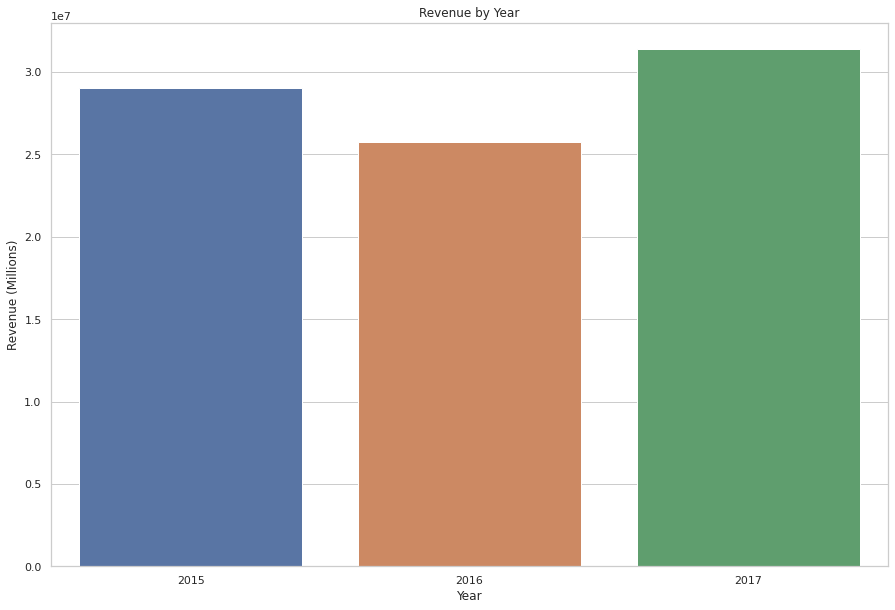

In [33]:
sns.set_theme(style='whitegrid')

# create new dataframe with revenue by year
df_revenue = df.groupby('year')['net_revenue'].sum().reset_index()

# plot
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data = df_revenue, x='year', y='net_revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.title('Revenue by Year')
plt.show()

## Customer change by year

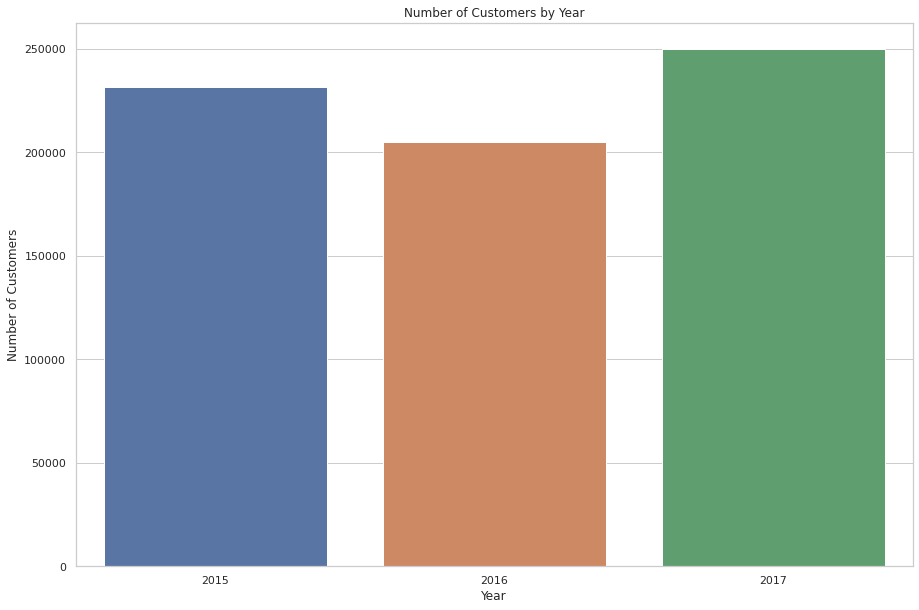

In [41]:
df_customers = df.groupby('year')['customer_email'].nunique().reset_index()

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data = df_customers, x='year', y='customer_email')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Year')
plt.show()